<a href="https://colab.research.google.com/github/arjunverma2004/Krish-Naik-Data-Science-course-code/blob/main/Practice%20Code/S28_Practice_gpt_ques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('BostonHousing.csv')

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


##3. Handle Missing Values (if any)

In [ ]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


##2. Perform Basic EDA (Exploratory Data Analysis)
Create basic plots to explore the relationships between features and the target variable (MEDV). What initial observations can you make?

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<Axes: >

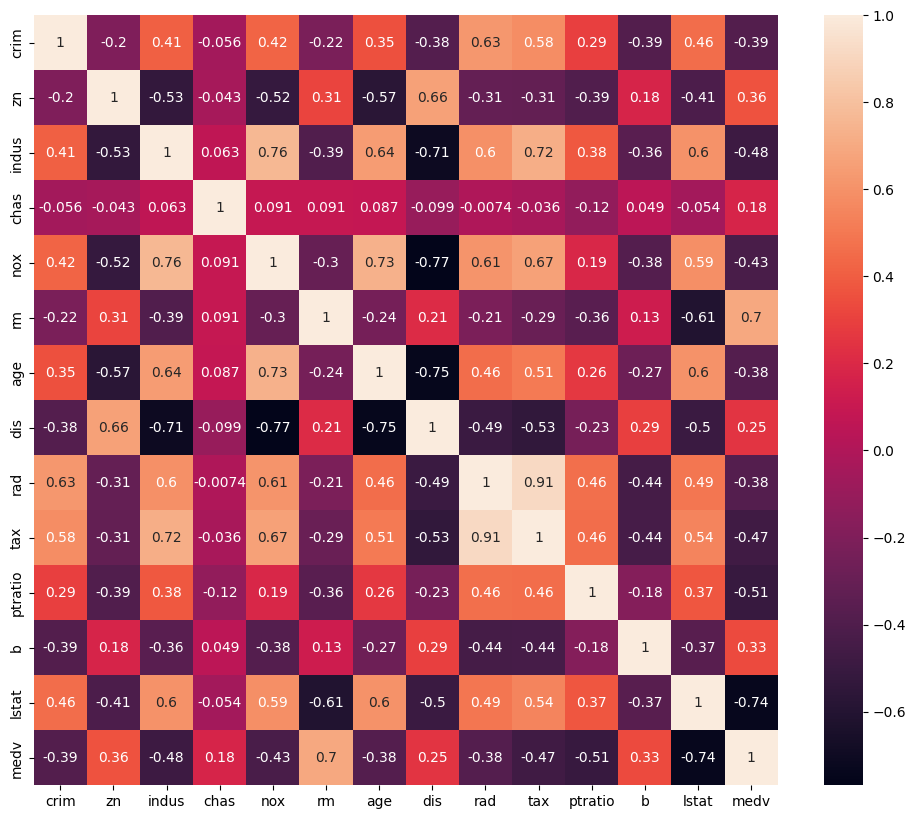

In [ ]:
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

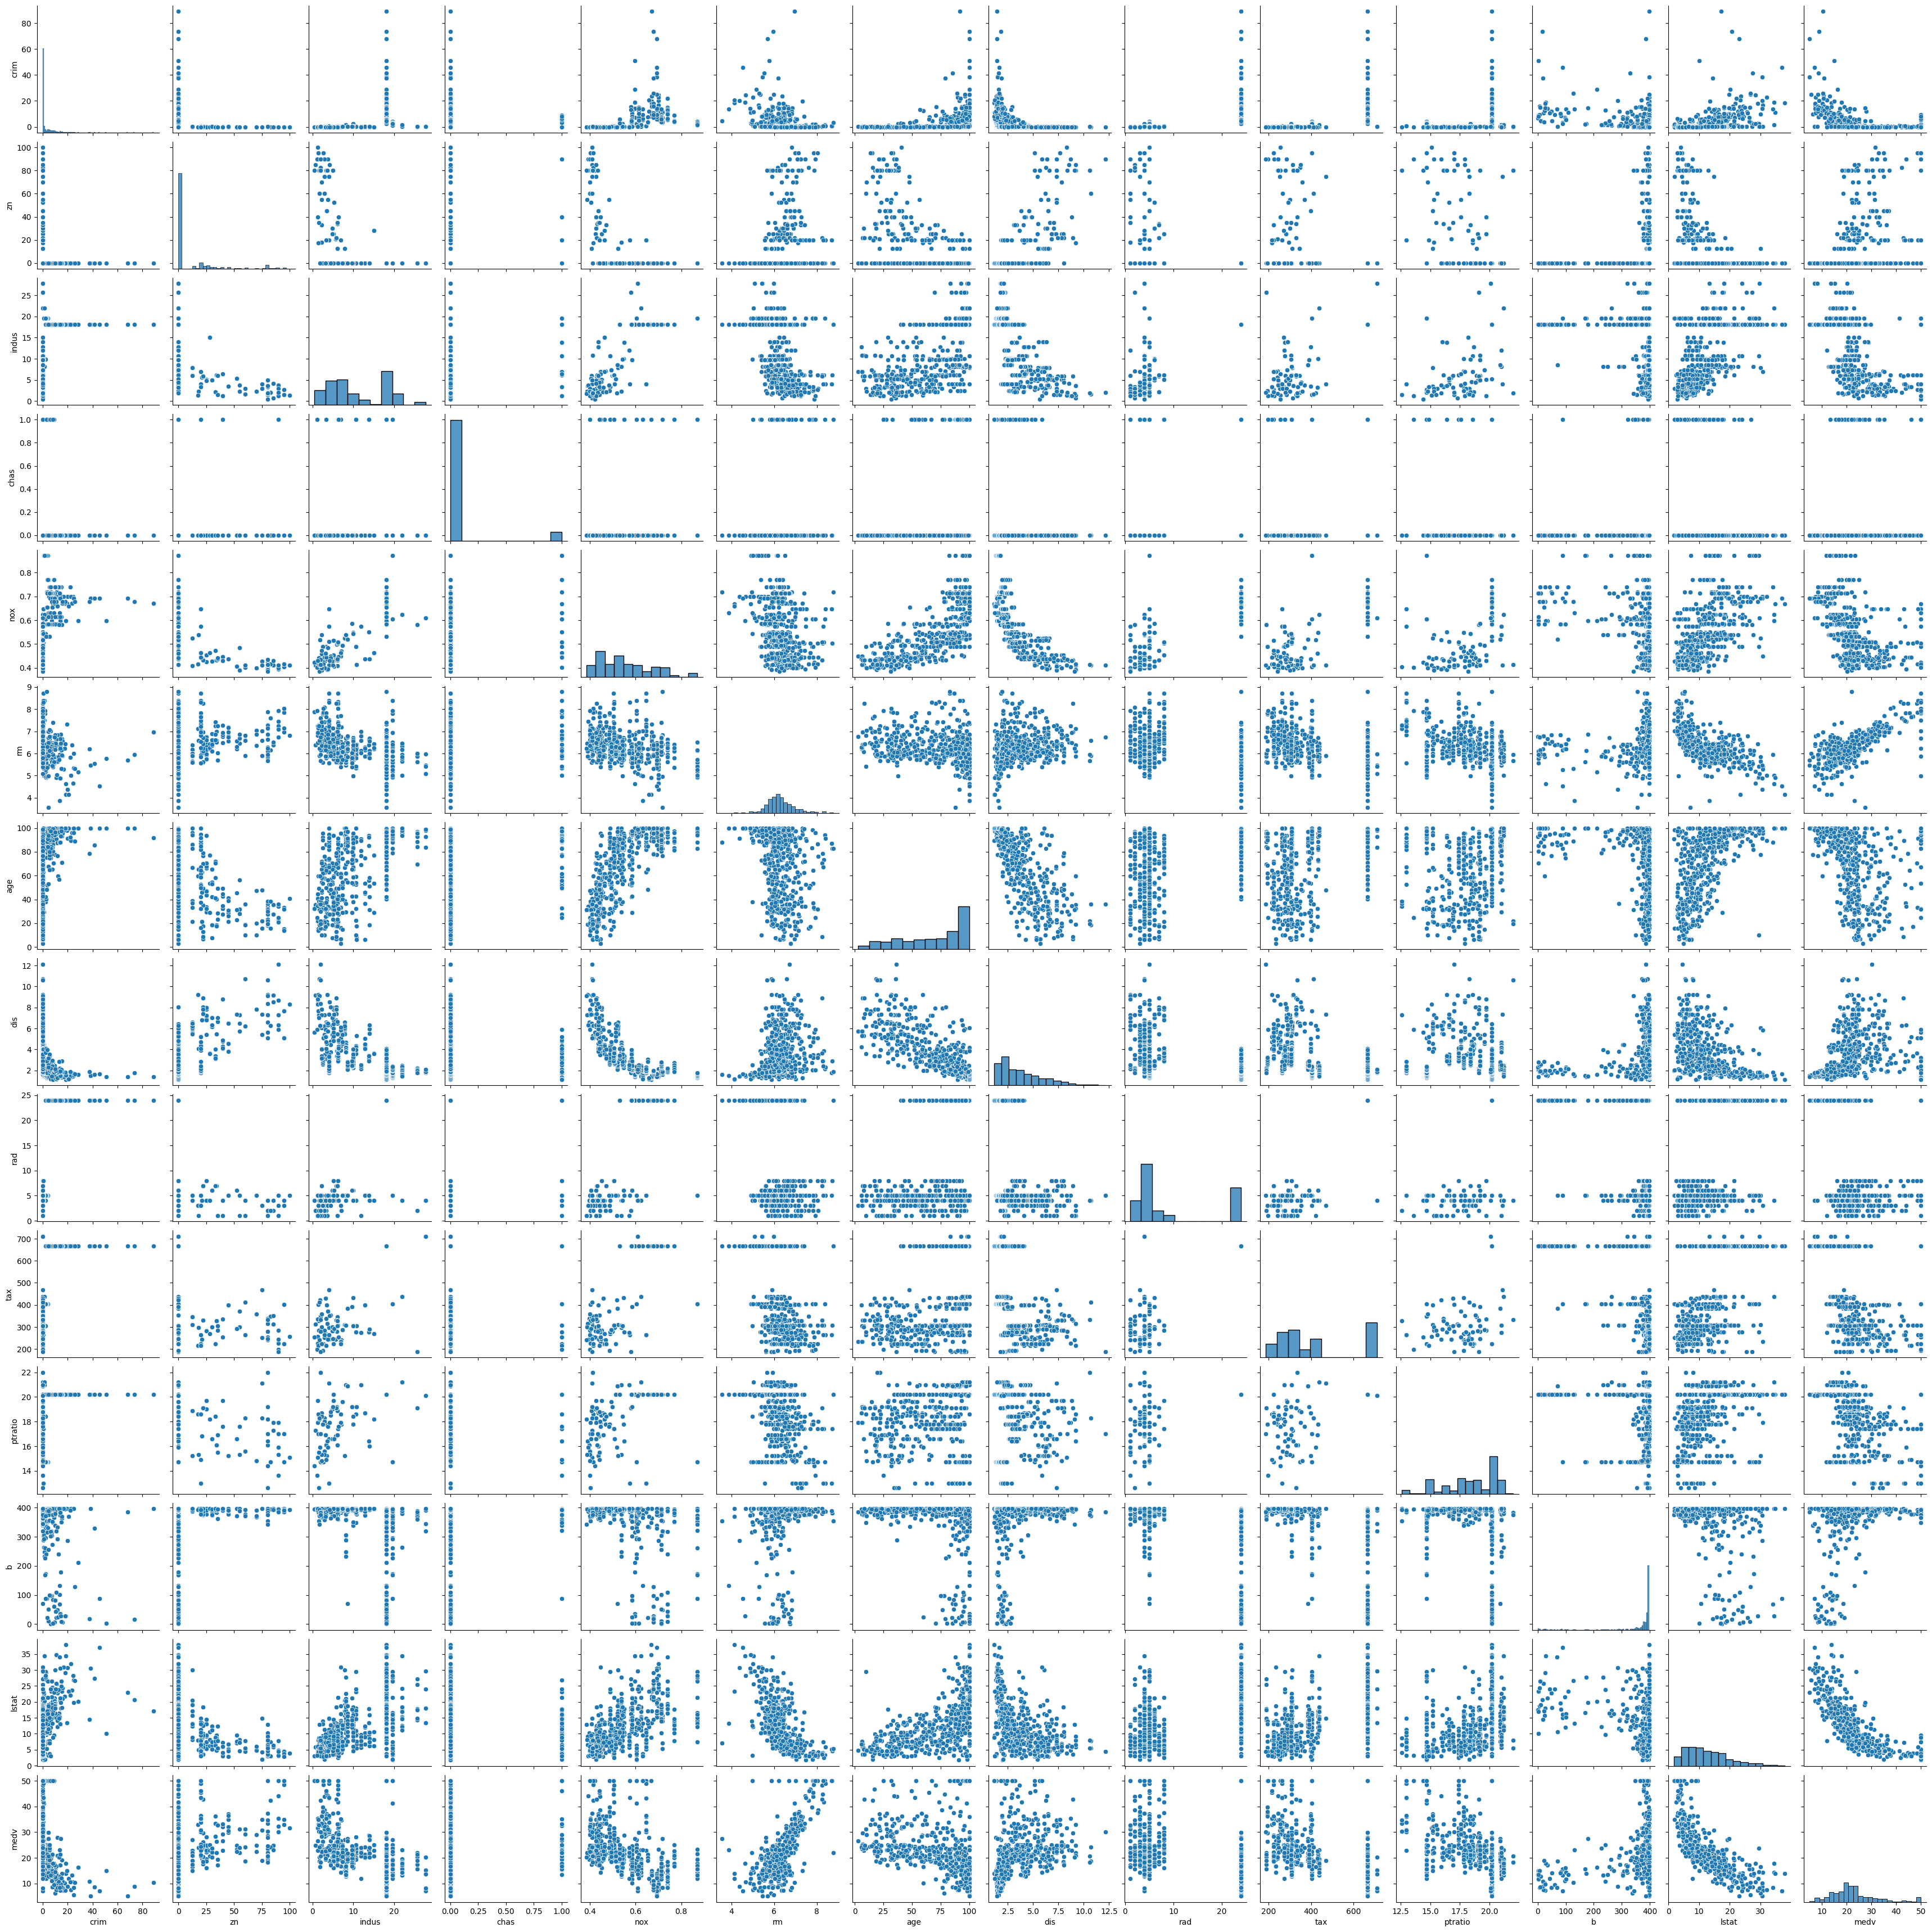

In [ ]:
sns.pairplot(df)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.85)
print(corr_features)

{'tax'}


In [ ]:
df.drop('tax',axis=1,inplace=True)

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2


##4. Feature Engineering - Create a New Feature
Create a new feature called LSTAT_CAT that categorizes the LSTAT variable into three groups:

Low (LSTAT < 10)
Medium (LSTAT between 10 and 20)
High (LSTAT > 20)
Add this new categorical feature to the dataset.
## 5. Encoding Categorical Feature
Encode the LSTAT_CAT feature using One-Hot Encoding. Show the resulting columns after encoding.

In [ ]:
df['lstat_cat']=df['lstat']
for i in df['lstat']:
  if i<10:
    df['lstat_cat'].replace(i,0,inplace=True)
  elif i>=10 and i<=20:
    df['lstat_cat'].replace(i,1,inplace=True)
  else:
    df['lstat_cat'].replace(i,2,inplace=True)

<ipython-input-3-d521494b0101>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lstat_cat'].replace(i,0,inplace=True)
<ipython-input-3-d521494b0101>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [ ]:
df['lstat_cat'].value_counts()

,count
lstat_cat,
0.0,219
1.0,213
2.0,74


##6. Perform Feature Selection
Use correlation analysis to select the top 5 features most correlated with the target variable (MEDV). List these features.



<Axes: >

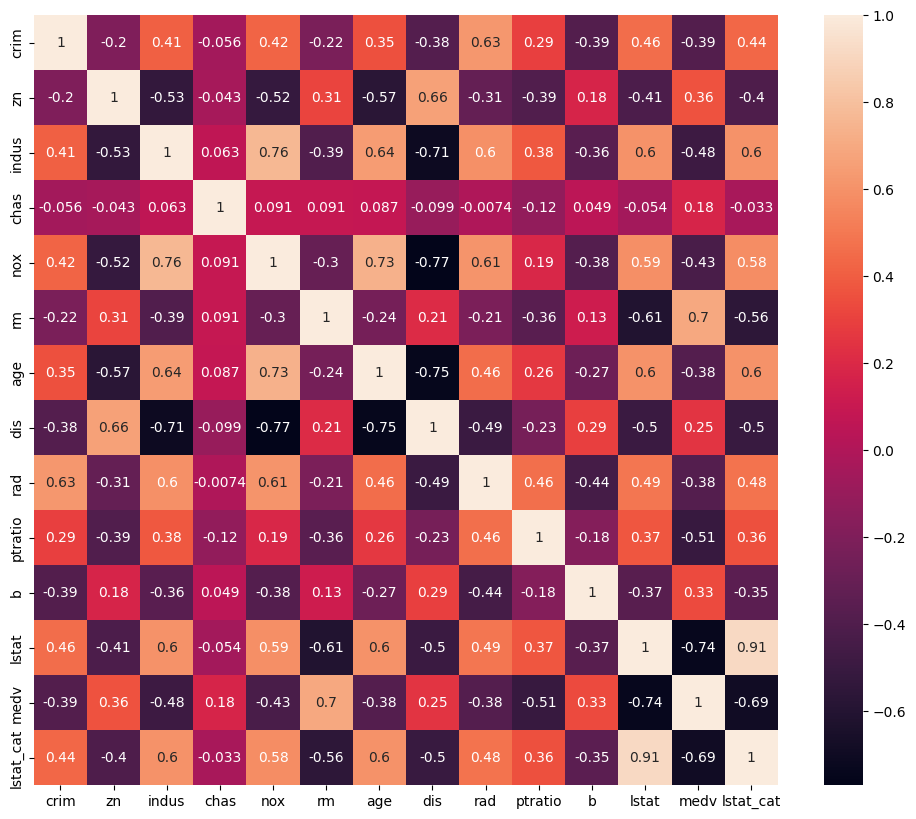

In [ ]:
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
df.drop(['lstat'],axis=1,inplace=True)

In [ ]:
correlation_with_medv = df.corr()['medv'].abs().sort_values(ascending=False)
top_5_features = correlation_with_medv[1:6]
print(top_5_features)

lstat        0.737663
rm           0.695360
lstat_cat    0.693167
ptratio      0.507787
indus        0.483725
Name: medv, dtype: float64


In [ ]:
df.columns.values

array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'b', 'medv', 'lstat_cat'], dtype=object)

In [ ]:
df=df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'b', 'lstat_cat', 'medv']]

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat_cat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,0.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,0.0,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,0.0,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,0.0,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,0.0,36.2


##7. Train a Ridge Regression Model
Split the data into train and test sets, then train a Ridge Regression model using the top 5 features you selected.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['medv','tax','rm'], axis=1), df['medv'], test_size=0.25, random_state=42)

<Axes: >

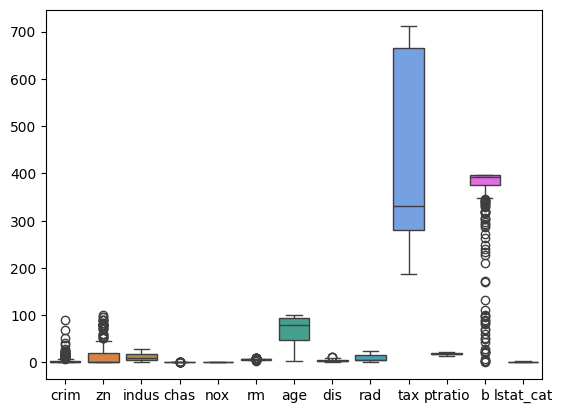

In [ ]:
sns.boxplot(data=X_train)

In [ ]:
mean=X_train['crim'].mean()
Q1=X_train['crim'].quantile(0.25)
Q3=X_train['crim'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
X_train['crim']=np.where(X_train['crim']>upper_limit,mean,X_train['crim'])
X_train['crim']=np.where(X_train['crim']<lower_limit,mean,X_train['crim'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<Axes: ylabel='Count'>

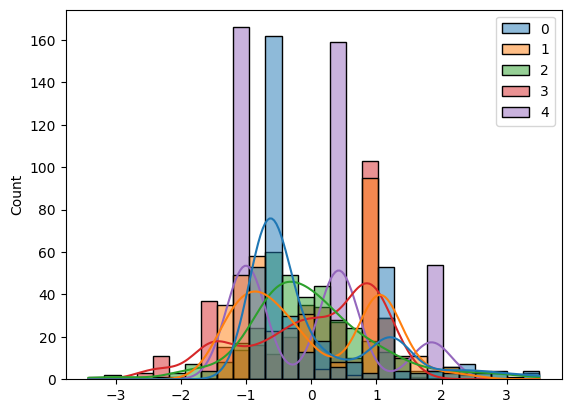

In [ ]:
sns.histplot(data=X_train,kde=True)

<Axes: >

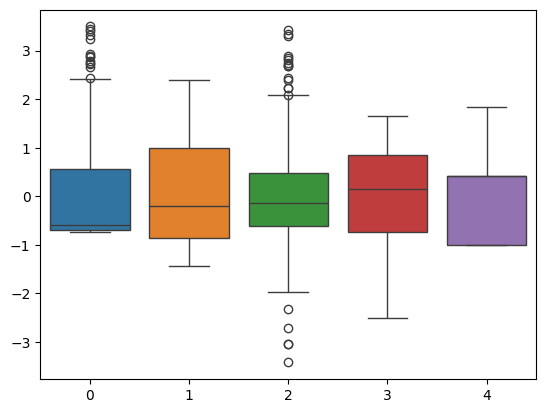

In [ ]:
sns.boxplot(data=X_train)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

Mean absolute error 3.629303961315002
R2 Score 0.6240628482881587


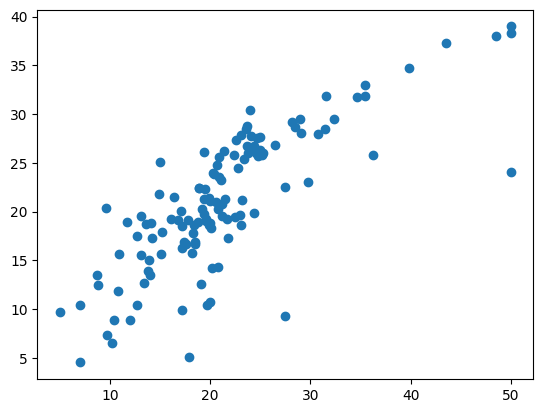

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
y_pred=ridge.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)


Mean absolute error 3.6334448068250853
R2 Score 0.6139619098509534


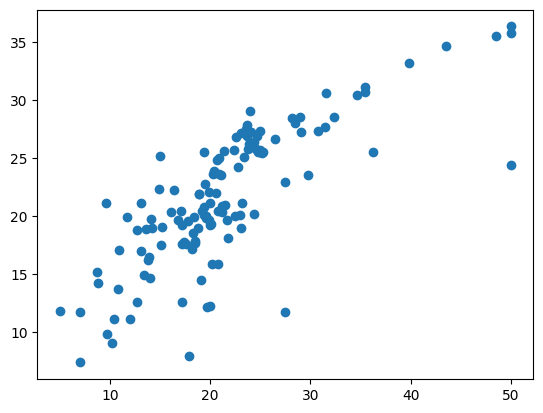

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

##10. Apply Cross-Validation
Apply k-fold cross-validation (k=5) to evaluate the performance of the final Ridge model using the complete dataset. What is the average cross-validation score?

Mean absolute error 3.6017624591021242
R2 Score 0.6264723194649382


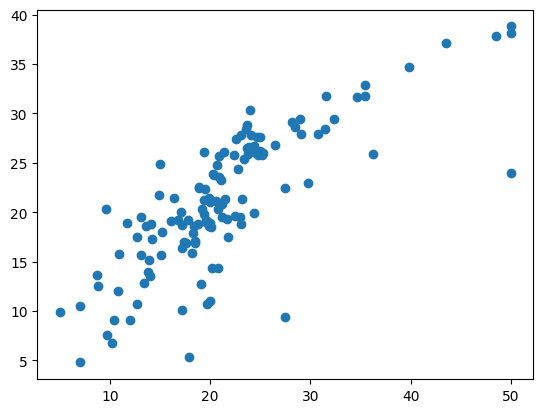

In [ ]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train, y_train)
y_pred=ridgecv.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [ ]:
ridgecv.alpha_

10.0

In [ ]:
from sklearn.model_selection import cross_val_score

final_ridge = Ridge(alpha=10)

cv_scores = cross_val_score(final_ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()

print(f"Average 5-Fold Cross-Validation MSE: {mean_cv_score:.2f}")


Average 5-Fold Cross-Validation MSE: 30.15


Mean absolute error 3.6107939317949027
R2 Score 0.6276512164941362


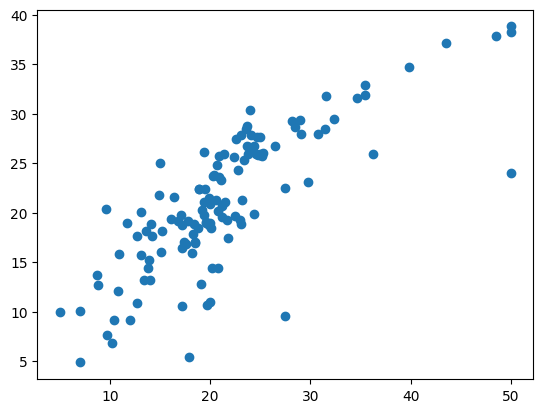

In [ ]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train, y_train)
y_pred=lassocv.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

#Let's Improve the Accuracy

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['medv','tax','rm'], axis=1), df['medv'], test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

Mean absolute error 3.650780098168449
R2 Score 0.662871499950255


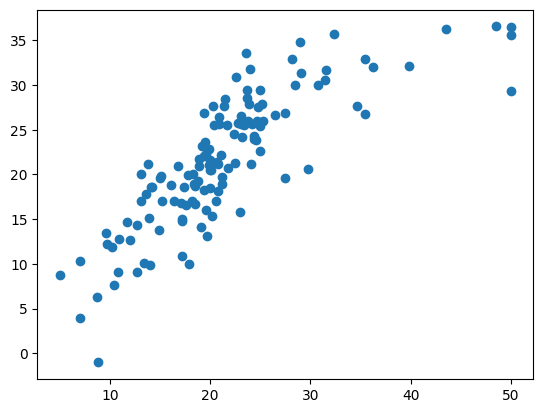

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
y_pred=ridge.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)